# CSC 310 Final Project: Crop Yield Prediction App

Group Members: Ryan Jensen, Timothy Hourihan


## Data Preprocessing

#### Importing necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import plotly.express as px
from google.colab import drive

#### Mounting to google drive and reading the dataset

In [ ]:
drive.mount('/content/drive')
df=pd.read_csv("/content/drive/MyDrive/yield_df.csv")
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [ ]:
df.head(10)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37
5,5,Albania,Wheat,1990,30197,1485.0,121.0,16.37
6,6,Albania,Maize,1991,29068,1485.0,121.0,15.36
7,7,Albania,Potatoes,1991,77818,1485.0,121.0,15.36
8,8,Albania,"Rice, paddy",1991,28538,1485.0,121.0,15.36
9,9,Albania,Sorghum,1991,6667,1485.0,121.0,15.36


#### Removing the unnamed column

In [ ]:
df.drop("Unnamed: 0", axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


####Changing column names to fit our project

In [ ]:
df = df.rename(columns = {"Area":"country"})
df = df.rename(columns = {"Item":"crop"})
df = df.rename(columns = {"Year":"year"})
df.head(10)

,country,crop,year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37
5,Albania,Wheat,1990,30197,1485.0,121.0,16.37
6,Albania,Maize,1991,29068,1485.0,121.0,15.36
7,Albania,Potatoes,1991,77818,1485.0,121.0,15.36
8,Albania,"Rice, paddy",1991,28538,1485.0,121.0,15.36
9,Albania,Sorghum,1991,6667,1485.0,121.0,15.36


In [ ]:
df.isna().sum(axis=0)

country                          0
crop                             0
year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

## Building our Model

#### Importing necessary libraries

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

#### Preparing the data for moedeling

In [ ]:
# Separating dataset into features and target
X = df.drop('hg/ha_yield', axis=1)
y = df['hg/ha_yield']

# Encoding categorical data
label_encoders = {}
for column in ['country', 'crop']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Training and evaluating models

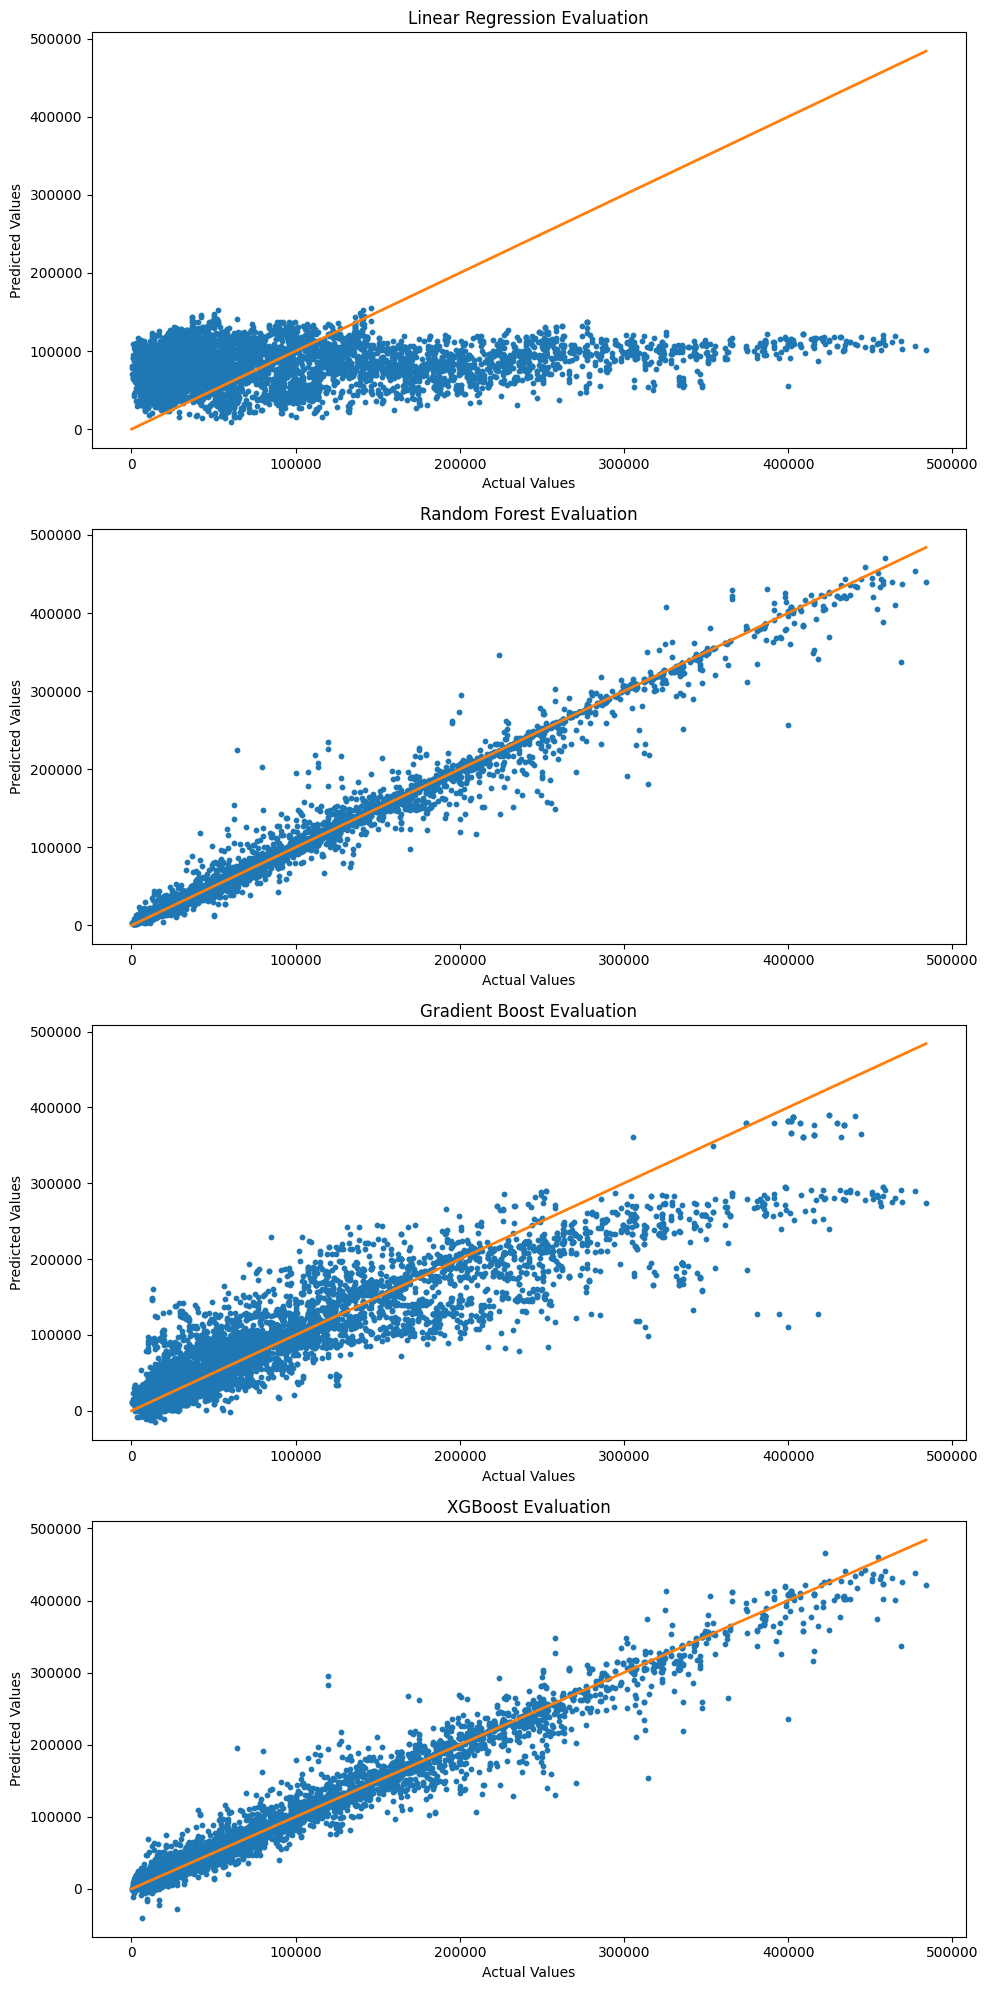

,Model,Accuracy,MSE,R2_score
0,Linear Regression,0.086285,6772588013.105465,0.086285
1,Random Forest,0.984750,113038880.346521,0.984750
2,Gradient Boost,0.832376,1242452823.324800,0.832376
3,XGBoost,0.972644,202765553.336630,0.972644


In [ ]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
]

results = []
fig, axs = plt.subplots(len(models), figsize=(10, 20))

for idx, (name, model) in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))

    # Plotting
    axs[idx].scatter(y_test, y_pred, s=10, color='#1f77b4')  # Blue color
    axs[idx].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#ff7f0e', linewidth=2)  # Orange color
    axs[idx].set_title(f'{name} Evaluation')
    axs[idx].set_xlabel('Actual Values')
    axs[idx].set_ylabel('Predicted Values')

plt.tight_layout()
plt.show()

# Displaying results in a DataFrame
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])
df_styled = df_results.style.background_gradient(cmap='viridis', subset=['Accuracy', 'R2_score']).background_gradient(cmap='coolwarm_r', subset=['MSE'])
display(df_styled)


#### KFold Validation

In [ ]:
results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('KNN',KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree',DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor',BaggingRegressor(n_estimators=150, random_state=42))
          ]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, MAE, MAPE, R2_score))

    print(name)
    num_folds = 5
    kf = KFold(n_splits=num_folds, shuffle=True)
    scores = cross_val_score(model, X, y, cv=kf)

    for fold, score in enumerate(scores):
        print(f"Fold {fold+1}: {score}")

    mean_score = np.mean(scores)
    print(f"Mean Score: {mean_score}")
    print('-'*30)


df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'MAE', 'MAPE', 'R2_score'])
df_styled_best = df.style.highlight_max(subset=['Accuracy','R2_score'], color='lightblue').highlight_min(subset=['MSE','MAE','MAPE'], color='lightblue').highlight_max(subset=['MSE','MAE','MAPE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

display(df_styled_best)

Linear Regression
Fold 1: 0.08882322937817544
Fold 2: 0.07302850849929388
Fold 3: 0.08122451243767348
Fold 4: 0.07777985725619707
Fold 5: 0.08827125455704665
Mean Score: 0.08182547242567731
------------------------------
Random Forest
Fold 1: 0.9865064332271751
Fold 2: 0.9820512965565616
Fold 3: 0.9866953452507845
Fold 4: 0.9863350958107171
Fold 5: 0.9885270595010045
Mean Score: 0.9860230460692485
------------------------------
Gradient Boost
Fold 1: 0.8362178432264653
Fold 2: 0.8296698516830925
Fold 3: 0.8307945219704955
Fold 4: 0.822130467432245
Fold 5: 0.8307111079628522
Mean Score: 0.8299047584550301
------------------------------
XGBoost
Fold 1: 0.9746287481275826
Fold 2: 0.9734026537497505
Fold 3: 0.9748428517561808
Fold 4: 0.9748243427286396
Fold 5: 0.976518366961718
Mean Score: 0.9748433926647744
------------------------------
KNN
Fold 1: 0.3458177909248662
Fold 2: 0.3076194951761573
Fold 3: 0.3212617386298453
Fold 4: 0.2960860675059689
Fold 5: 0.32229557756378513
Mean Score: 0

,Model,Accuracy,MSE,MAE,MAPE,R2_score
0,Linear Regression,0.086285,6772588013.105465,62779.325886,2.337926,0.086285
1,Random Forest,0.984750,113038880.346521,3986.903935,0.085461,0.984750
2,Gradient Boost,0.832376,1242452823.324800,21946.768516,0.560884,0.832376
3,XGBoost,0.972644,202765553.336630,7946.193302,0.211445,0.972644
4,KNN,0.294480,5229414690.215181,49310.895291,1.538624,0.294480
5,Decision Tree,0.971242,213159160.606161,4271.516346,0.086636,0.971242
6,Bagging Regressor,0.984877,112097320.982345,3979.566797,0.084264,0.984877
